In [2]:
import pandas as pd 
import joblib

In [4]:
brent_prices = pd.read_csv('C:\\Users\\Aman\\Desktop\\kifyaw10\\data\\raw\\BrentOilPrices.csv') 
df = pd.read_csv('C:\\Users\\Aman\\Desktop\\kifyaw10\\data\\processed\\processed.csv')
brent_prices['Date'] = pd.to_datetime(brent_prices['Date'])
brent_prices.set_index('Date', inplace=True)
df['Date']= pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)


C:\Users\Aman\AppData\Local\Temp\ipykernel_16304\3061290823.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  brent_prices['Date'] = pd.to_datetime(brent_prices['Date'])


In [5]:
train_size = int(len(brent_prices) * 0.8)  # 80% train, 20% test

train, test = brent_prices[:train_size], brent_prices[train_size:]
predicted = test[:30]

In [6]:
from statsmodels.tsa.arima.model import ARIMA
p,d,q = 5,2,1
# Train ARIMA
arima_model = ARIMA(train, order=(p, d, q))  # Define p, d, q via AIC minimization
arima_fit = arima_model.fit()
arima_forecast = arima_fit.forecast(steps=30)  # Predict next 30 days


c:\Users\Aman\Desktop\kifyaw10\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Aman\Desktop\kifyaw10\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Aman\Desktop\kifyaw10\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Aman\Desktop\kifyaw10\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning

In [7]:
df_predictions = pd.DataFrame({'Date': predicted.index, 'Predicted Price': arima_forecast.values})
# df_predictions

In [8]:
from arch import arch_model

# Train GARCH model
garch_model = arch_model(train, vol='Garch', p=1, q=1)
garch_fit = garch_model.fit()
garch_forecast = garch_fit.forecast(start=0, horizon=30)


Iteration:      1,   Func. Count:      6,   Neg. LLF: 3449228.415784071
Iteration:      2,   Func. Count:     12,   Neg. LLF: 1045309.535658939
Iteration:      3,   Func. Count:     19,   Neg. LLF: 38797.22979007702
Iteration:      4,   Func. Count:     26,   Neg. LLF: 29938.792638755283
Iteration:      5,   Func. Count:     32,   Neg. LLF: 30510.923258258983
Iteration:      6,   Func. Count:     38,   Neg. LLF: 27964.560819876355
Iteration:      7,   Func. Count:     43,   Neg. LLF: 27954.345581189
Iteration:      8,   Func. Count:     49,   Neg. LLF: 26769.253173293557
Iteration:      9,   Func. Count:     54,   Neg. LLF: 26656.36779426311
Iteration:     10,   Func. Count:     59,   Neg. LLF: 37537.11061270586
Iteration:     11,   Func. Count:     67,   Neg. LLF: 30964.564352494737
Iteration:     12,   Func. Count:     73,   Neg. LLF: 26010.49393036366
Iteration:     13,   Func. Count:     78,   Neg. LLF: 26500.2200008754
Iteration:     14,   Func. Count:     86,   Neg. LLF: 25997.27

In [9]:

x = df.drop('Price', axis=1)
y = df['Price']
x_train, x_test = x[:train_size], x[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


from statsmodels.tsa.api import VAR

train_data = df[:train_size]
test_data = df[train_size:]
# Fit VAR model
var_model = VAR(train_data)
var_fit = var_model.fit()

# Forecast the next `len(test_data)` steps
lags = var_fit.k_ar  # Number of lags used in the model
input_data = train_data.values[-lags:]  # Last observations from training data

var_forecast = var_fit.forecast(input_data, steps=len(test_data))

# Convert forecast into DataFrame
forecast_df = pd.DataFrame(var_forecast, index=test_data.index, columns=df.columns)

# Display results
print(forecast_df.head())


                Price        US_GDP  US_Inflation  US_Interest_Rate  \
Date                                                                  
2015-10-19  48.978606  15416.420752    224.449397          1.170265   
2015-10-20  48.999878  15366.685505    218.082628          1.668685   
2015-10-21  49.021482  15296.193190    213.962483          1.996273   
2015-10-22  49.042471  15214.294154    211.182874          2.216324   
2015-10-23  49.062522  15127.105789    209.217664          2.367701   

            Russia_Inflation        EU_GDP  EU_Inflation  
Date                                                      
2015-10-19          0.555959  2.395579e+06     95.692888  
2015-10-20          0.734251  2.392846e+06     93.555750  
2015-10-21          0.943429  2.388598e+06     92.139714  
2015-10-22          1.144752  2.383750e+06     91.184779  
2015-10-23          1.325458  2.378750e+06     90.526379  


c:\Users\Aman\Desktop\kifyaw10\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [10]:
df_predictions['Date']= pd.to_datetime(df_predictions['Date'])
df_predictions.set_index('Date', inplace=True)


In [11]:


# predicted['Date'] = pd.to_datetime('Date',  format='mixed')
predicted.head()

,Price
Date,
2015-10-19,47.51
2015-10-20,46.93
2015-10-21,46.72
2015-10-22,46.59
2015-10-23,46.30


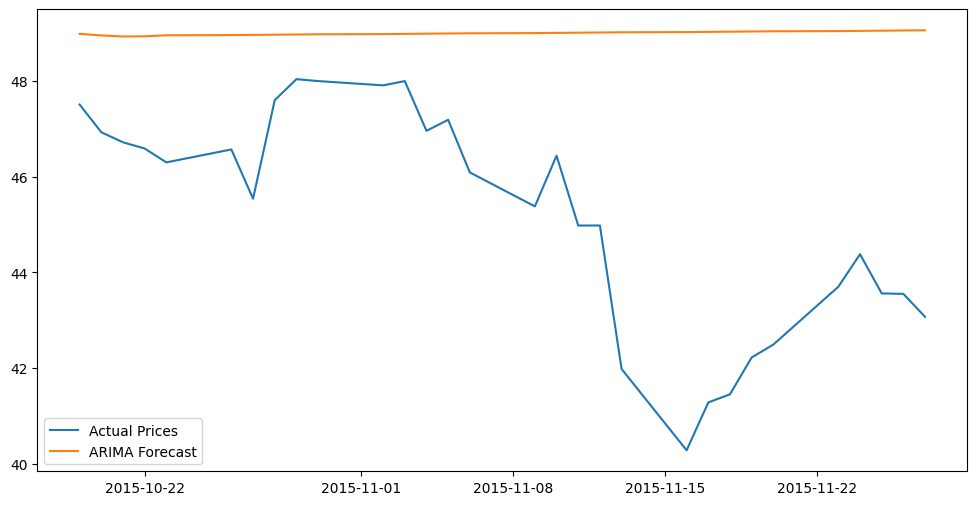

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(predicted, label="Actual Prices")
plt.plot(df_predictions, label="ARIMA Forecast")
# plt.fill_between(range(len(bsts_forecast)), 
#                  bsts_forecast - bsts_forecast.std(), 
#                  bsts_forecast + bsts_forecast.std(), 
#                  color='gray', alpha=0.3, label="BSTS Uncertainty")

plt.legend()
plt.show()


In [13]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense


In [20]:
df_monthly = brent_prices.resample('M').mean()

C:\Users\Aman\AppData\Local\Temp\ipykernel_16304\2556301289.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = brent_prices.resample('M').mean()


In [21]:
scaler = MinMaxScaler(feature_range=(0, 1))

oil_data_scaled = scaler.fit_transform(df_monthly.values.reshape(-1, 1))


def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

In [22]:
time_step = 60
X, y = create_dataset(oil_data_scaled, time_step)


X = X.reshape(X.shape[0], X.shape[1], 1)


train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [23]:
# Build LSTM Model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(time_step, 1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=32)

# Make predictions
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

Epoch 1/20


c:\Users\Aman\Desktop\kifyaw10\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 61ms/step - loss: 0.0968
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - loss: 0.0248
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 0.0170
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - loss: 0.0156
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - loss: 0.0145
Epoch 6/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - loss: 0.0110
Epoch 7/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - loss: 0.0124
Epoch 8/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - loss: 0.0104
Epoch 9/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - loss: 0.0106
Epoch 10/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - loss: 0.0107
Epoch 11/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - loss: 0.0102
Epoch 12/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 0.0075
Epoch 13/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - loss: 0.0088
Epoch 14/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - loss: 0.0094
Epoch 15/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - loss: 0.0079
Epoch 16/20
10/

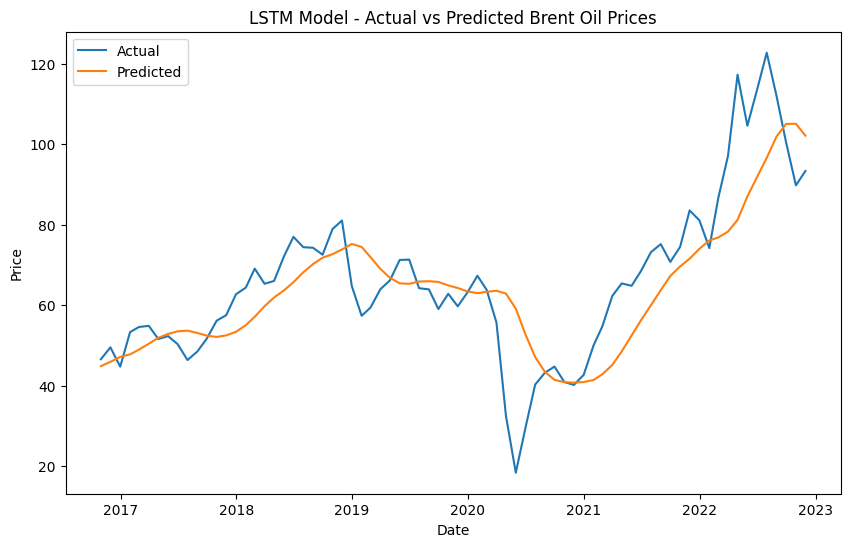

In [25]:
# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
# Ensure both have the same length
plt.plot(df_monthly.index[-len(y_test):], scaler.inverse_transform(y_test.reshape(-1, 1)), label='Actual')
plt.plot(df_monthly.index[-len(predictions):], predictions, label='Predicted')
plt.title("LSTM Model - Actual vs Predicted Brent Oil Prices")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()